# Import Dataset and Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

In [3]:
loan_data = pd.read_csv('loan_data.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [35]:
for i in loan_data.columns:
    print(i, loan_data[i].nunique())

Loan_ID 614
Gender 2
Married 2
Dependents 4
Education 2
Self_Employed 2
ApplicantIncome 505
CoapplicantIncome 287
LoanAmount 203
Loan_Amount_Term 10
Credit_History 2
Property_Area 3
Loan_Status 2


In [34]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Exploration

##### for the Gender column, we see how to fill the missing values

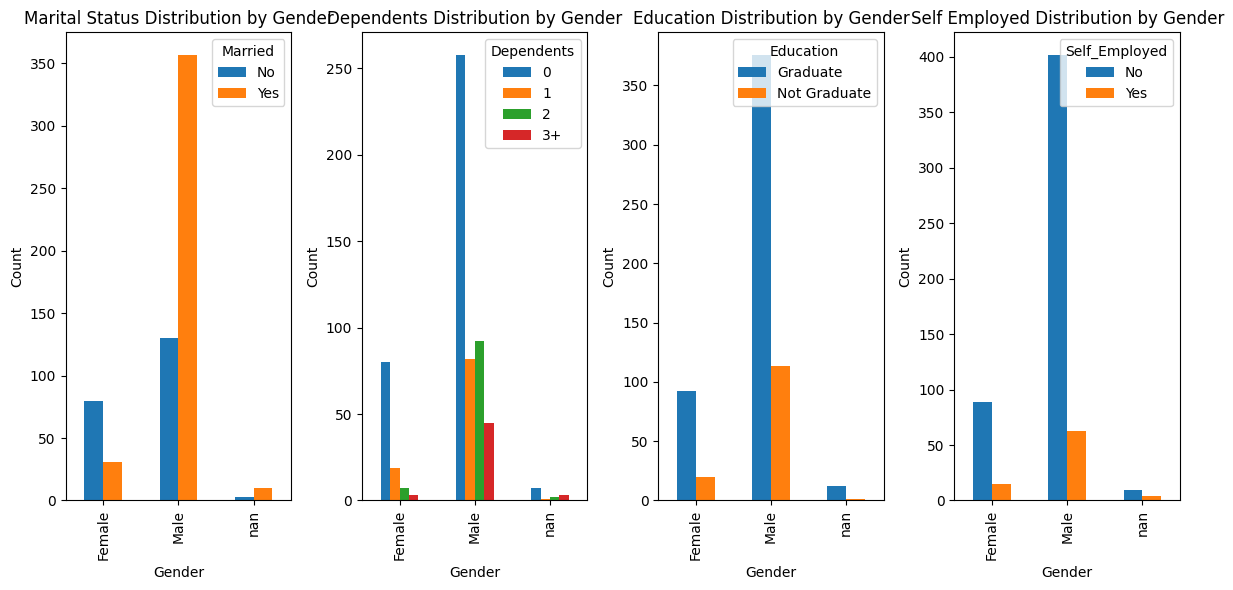

In [59]:
# Assuming you have loaded the dataset into a DataFrame called "loan_data"
grouped_G_M = loan_data.groupby(['Gender', 'Married']).size().unstack()
grouped_G_D = loan_data.groupby(['Gender', 'Dependents']).size().unstack()
grouped_G_E = loan_data.groupby(['Gender', 'Education']).size().unstack()
grouped_G_S = loan_data.groupby(['Gender', 'Self_Employed']).size().unstack()

# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

# Plot the first bar plot on the first subplot
grouped_G_M.plot(kind='bar', stacked=False, ax=axes[0])
axes[0].set_title('Marital Status Distribution by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot the second bar plot on the second subplot
grouped_G_D.plot(kind='bar', stacked=False, ax=axes[1])
axes[1].set_title('Dependents Distribution by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')

# Plot the third bar plot on the third subplot
grouped_G_E.plot(kind='bar', stacked=False, ax=axes[2])
axes[2].set_title('Education Distribution by Gender')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Count')

# Plot the fourth bar plot on the fourth subplot
grouped_G_S.plot(kind='bar', stacked=False, ax=axes[3])
axes[3].set_title('Self Employed Distribution by Gender')
axes[3].set_xlabel('Gender')
axes[3].set_ylabel('Count')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### for the Married column, we see how to fill the missing values

In [62]:
# get the records of null values in married column
married_null = loan_data[loan_data['Married'].isnull()]
married_null

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [64]:
similar_married_null = loan_data[(loan_data['Education']=='Graduate') & (loan_data['Self_Employed']=='No') & (loan_data['Loan_Status']=='Y')]
similar_married_null

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


#### for the Dependents column, we see how to fill the missing values

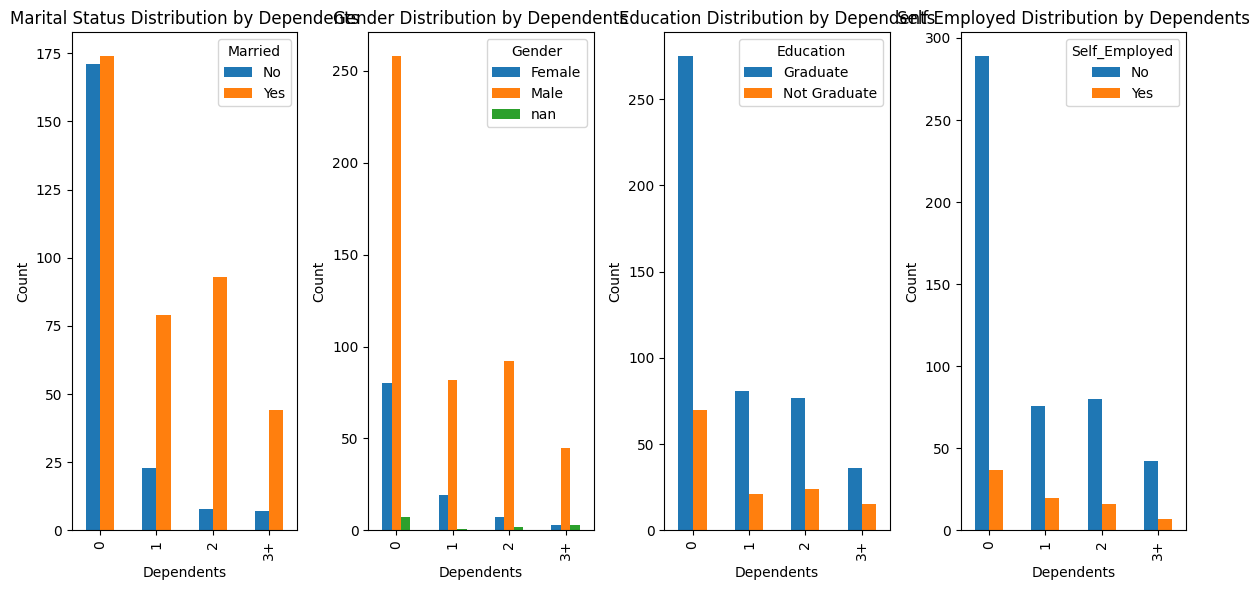

In [80]:
# Assuming you have loaded the dataset into a DataFrame called "loan_data"
grouped_G_M = loan_data.groupby(['Dependents', 'Married']).size().unstack()
grouped_G_D = loan_data.groupby(['Dependents', 'Gender']).size().unstack()
grouped_G_E = loan_data.groupby(['Dependents', 'Education']).size().unstack()
grouped_G_S = loan_data.groupby(['Dependents', 'Self_Employed']).size().unstack()

# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 6))

# Plot the first bar plot on the first subplot
grouped_G_M.plot(kind='bar', stacked=False, ax=axes[0])
axes[0].set_title('Marital Status Distribution by Dependents')
axes[0].set_xlabel('Dependents')
axes[0].set_ylabel('Count')

# Plot the second bar plot on the second subplot
grouped_G_D.plot(kind='bar', stacked=False, ax=axes[1])
axes[1].set_title('Gender Distribution by Dependents')
axes[1].set_xlabel('Dependents')
axes[1].set_ylabel('Count')

# Plot the third bar plot on the third subplot
grouped_G_E.plot(kind='bar', stacked=False, ax=axes[2])
axes[2].set_title('Education Distribution by Dependents')
axes[2].set_xlabel('Dependents')
axes[2].set_ylabel('Count')

# Plot the fourth bar plot on the fourth subplot
grouped_G_S.plot(kind='bar', stacked=False, ax=axes[3])
axes[3].set_title('Self Employed Distribution by Dependents')
axes[3].set_xlabel('Dependents')
axes[3].set_ylabel('Count')

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()